## Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


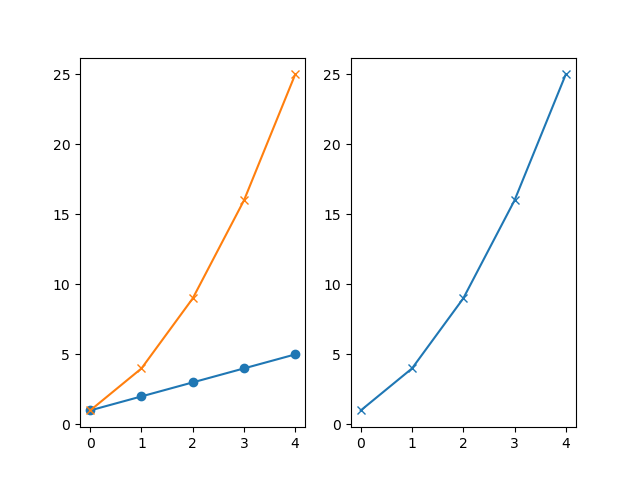

In [2]:
plt.figure()
plt.subplot(1, 2, 1)
linear = np.array([1,2,3,4,5])
plt.plot(linear, '-o')

In [3]:
square = linear ** 2
plt.subplot(1,2,2) # subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.plot(square, '-x')

In [4]:
plt.subplot(1,2,1) # plot exponential data on 1st subplot axes
plt.plot(square, '-x')

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


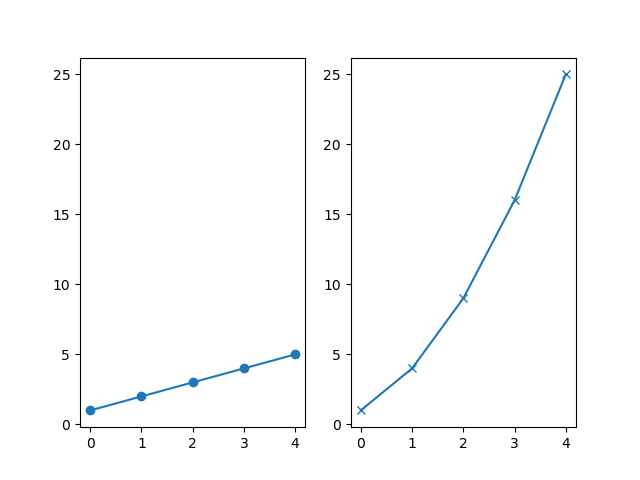

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear, '-o')
ax2 = plt.subplot(1, 2, 2, sharey = ax1)# ensure the two subplots share the same y axis
plt.plot(square, '-x')

<IPython.core.display.Javascript object>


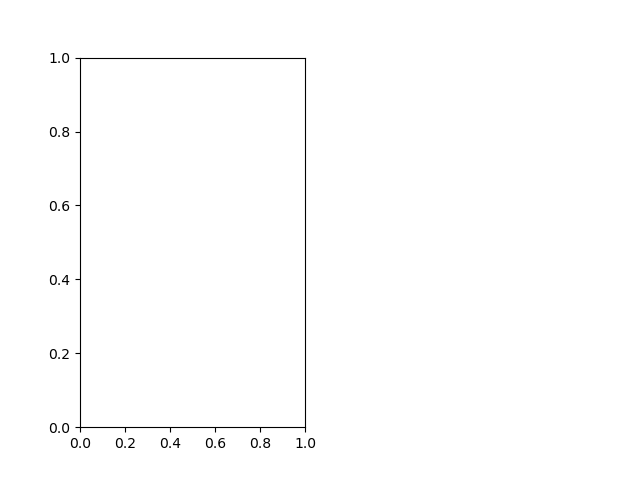

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


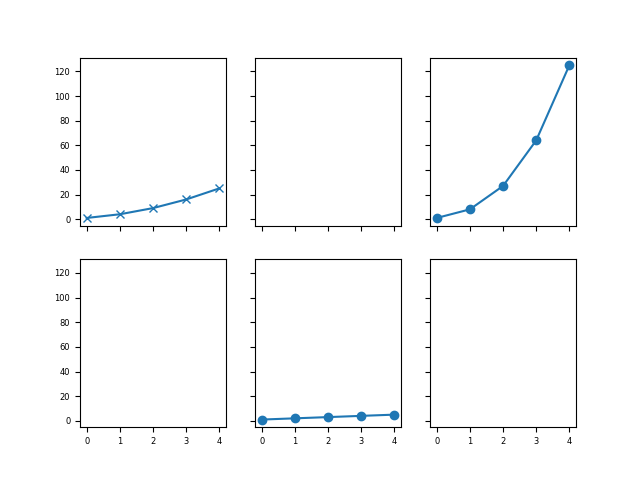

In [7]:
# create a 2x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))  = plt.subplots(2, 3, sharex = True, sharey = True)
ax5.plot(linear, '-o')
ax1.plot(square, '-x')
cube = linear ** 3
ax3.plot(cube, '-o')

In [8]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes(): 
    for label in ax.get_xticklabels() + ax.get_yticklabels(): #Get the x/y tick labels as a list of Text instances
        label.set_visible(True)
    ax.xaxis.set_tick_params(labelsize=6)
    ax.yaxis.set_tick_params(labelsize=6)

In [9]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


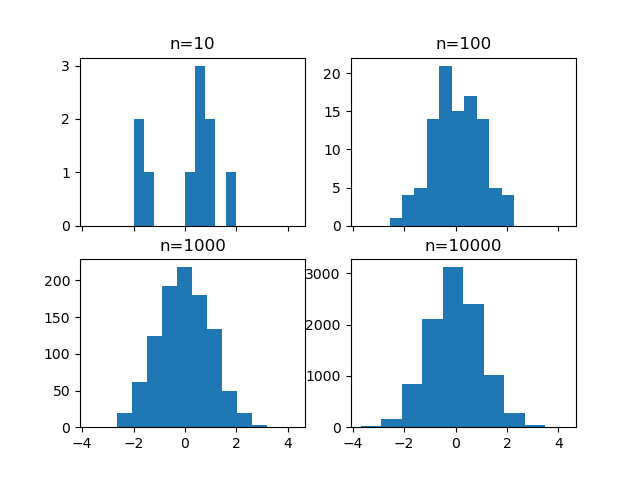

In [10]:
#create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]
# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0, len(axs)): #0, 1, 2, 3
    sample_size = 10 ** (n+1)
    sample = np.random.normal(loc = 0, scale = 1, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


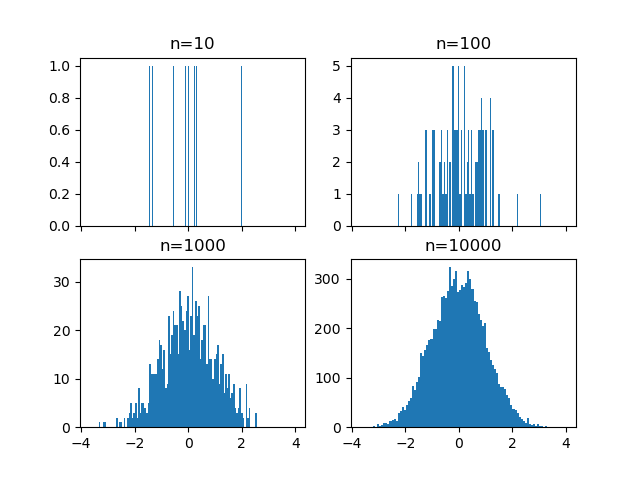

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)): #0, 1, 2, 3
    sample_size = 10 ** (n+1)
    sample = np.random.normal(loc = 0, scale = 1, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


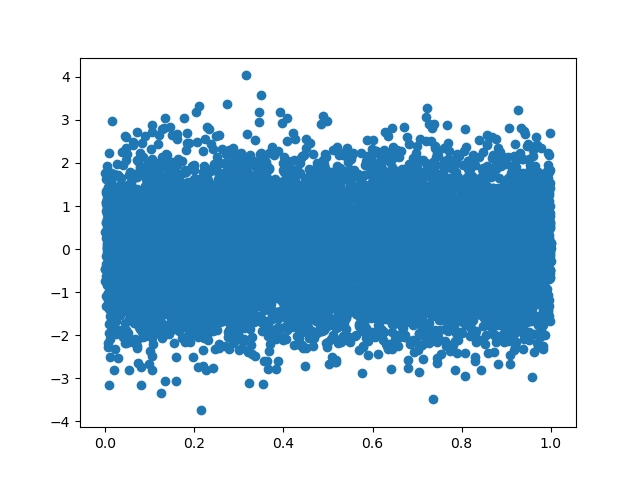

In [12]:
plt.figure()
Y = np.random.normal(loc = 0, scale = 1, size = 10000)
X = np.random.random(size = 10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


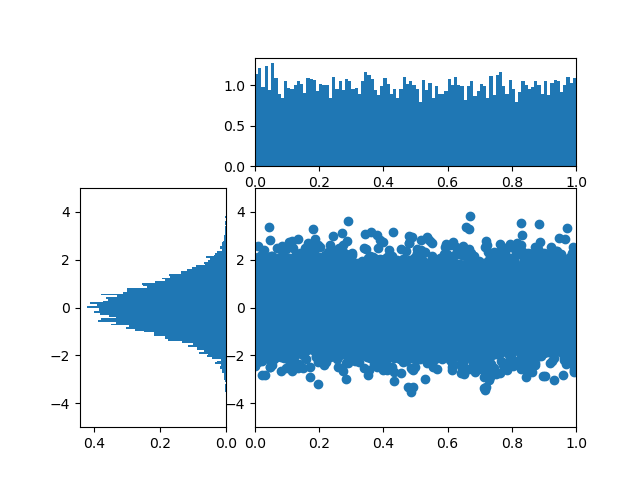

In [13]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_hist = plt.subplot(gspec[0, 1:]) #0, 1:
side_hist = plt.subplot(gspec[1:,0]) #1:, 0
lower_right = plt.subplot(gspec[1:,1:]) #1:, 1:

In [14]:
Y = np.random.normal(loc = 0, scale = 1, size = 10000)
X = np.random.random(size = 10000)
lower_right.scatter(X,Y)
top_hist.hist(X, bins = 100)
s = side_hist.hist(Y, bins = 100, orientation = 'horizontal')

In [15]:
# clear the histograms and plot normed histograms
top_hist.clear() #normed: Deprecated; use the density keyword argument instead
top_hist.hist(X, bins = 100, density = True) #the area (or integral) under the histogram will sum to 1
side_hist.clear()
side_hist.hist(Y, bins = 100, orientation = 'horizontal', density = True)

# flip the side histogram's x axis
side_hist.invert_xaxis()

In [16]:
# change axes limits
for ax in [top_hist, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_hist, lower_right]:
    ax.set_ylim(-5,5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [17]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [18]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.004280,0.502889,1.981104
std,0.998355,0.289555,1.412529
min,-4.072508,0.000038,0.009905
25%,-0.672913,0.249679,0.960539
50%,0.005981,0.504524,1.658121
75%,0.675389,0.754121,2.657892
max,4.289420,0.999900,12.226661


<IPython.core.display.Javascript object>


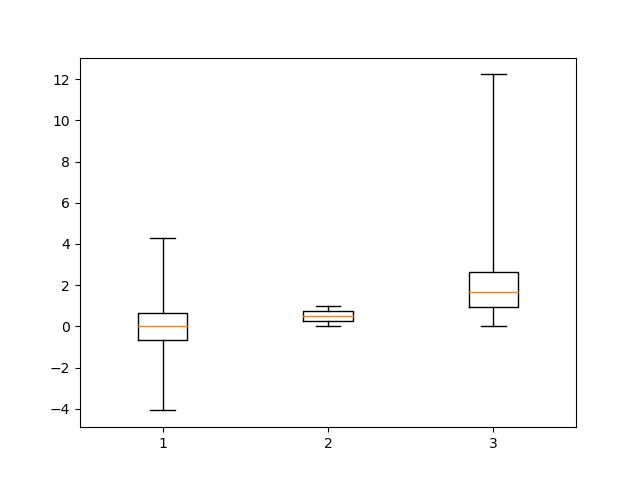

In [19]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis = 'range')

In [20]:
plt.clf() # clear the current figure
# plot boxplots for all three of df's columns in a list
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


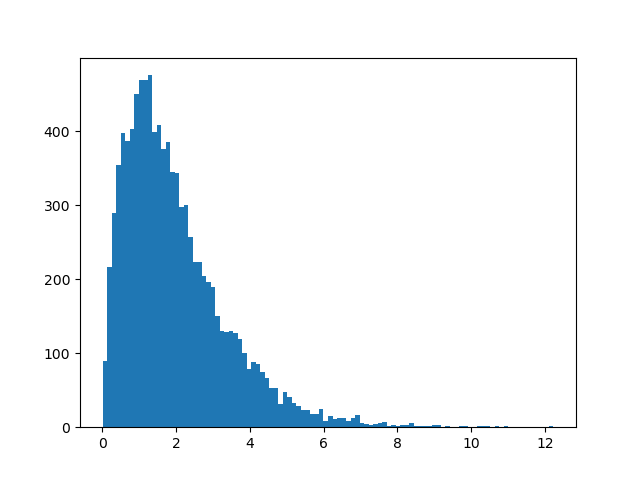

In [21]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


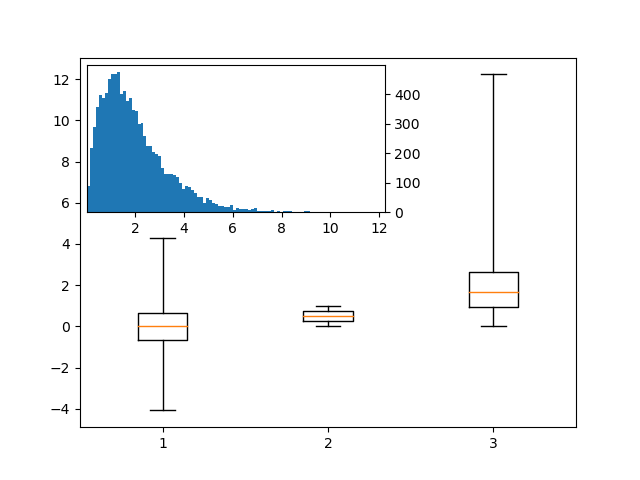

In [22]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'], bins = 100)
ax2.margins(x = 0)

In [23]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


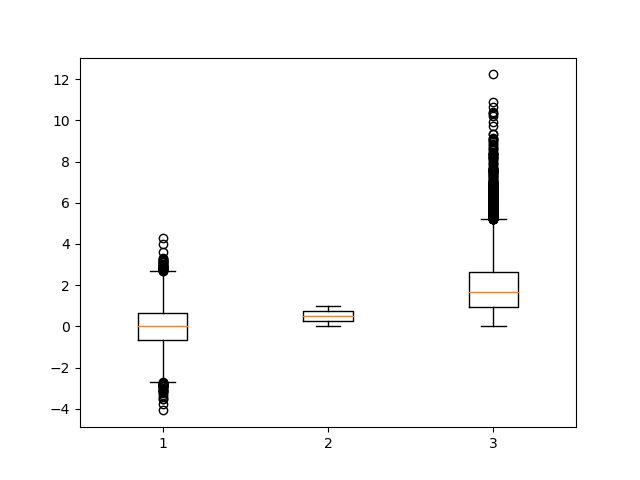

In [24]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ])

# Heatmaps

<IPython.core.display.Javascript object>


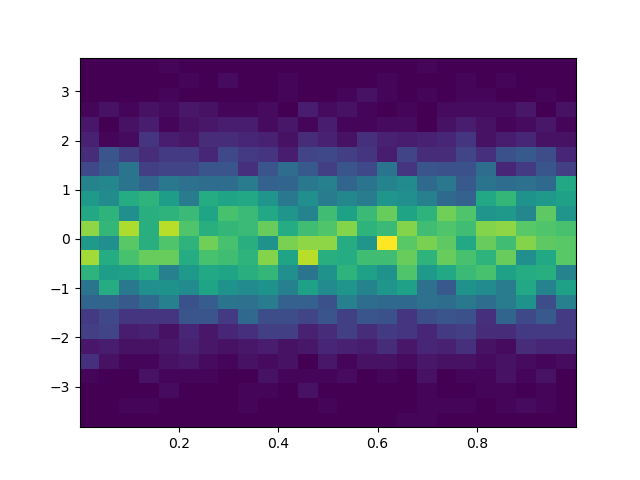

In [25]:
plt.figure()

Y = np.random.normal(loc = 0, scale = 1, size = 10000)
X = np.random.random(size = 10000)

_ = plt.hist2d(X, Y, bins = 25)

<IPython.core.display.Javascript object>


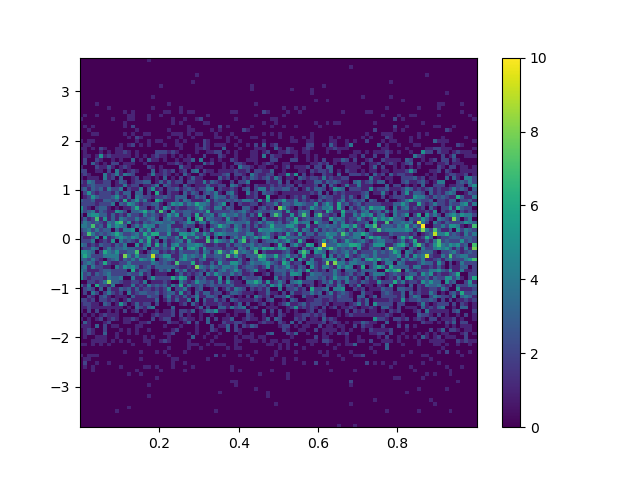

In [26]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [27]:
# add a colorbar legend
plt.colorbar()

# Animations

In [28]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [29]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins = bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


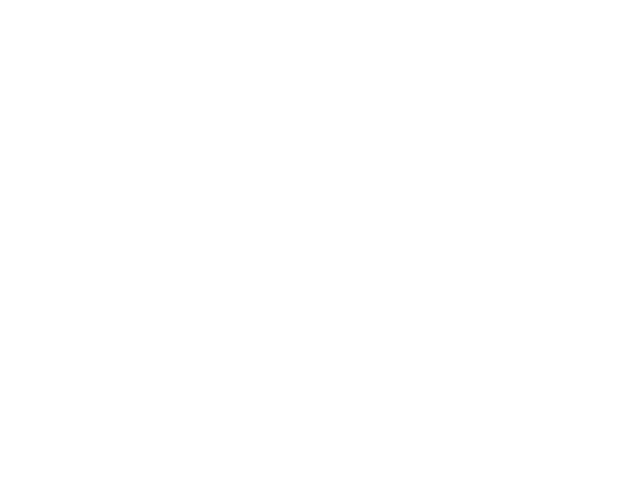

In [30]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


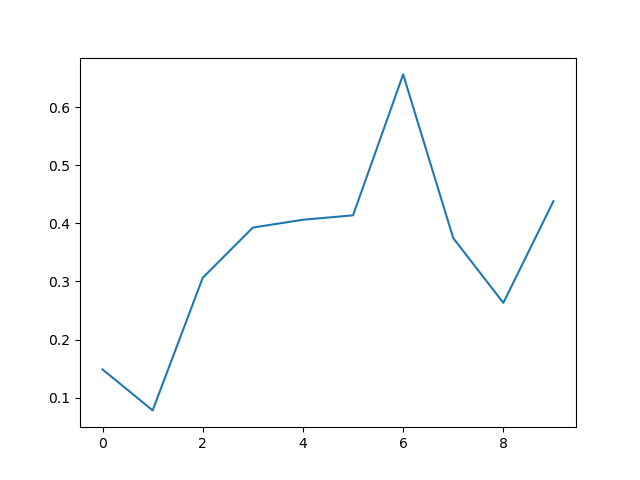

In [31]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

In [32]:
def onclick(data):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} \nand data {}, {}'.format(event.x, event.y, event.xdate, event.ydata))

In [33]:
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

In [34]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.201911,0.244065,Iraq
1,0.495141,0.690894,Chile
2,0.198115,0.624683,Brazil
3,0.775851,0.506438,India
4,0.841848,0.548678,USA
5,0.568456,0.422163,China
6,0.053262,0.496165,Mexico
7,0.702895,0.613441,Canada
8,0.093887,0.595530,Germany
9,0.540418,0.638988,UK


<IPython.core.display.Javascript object>


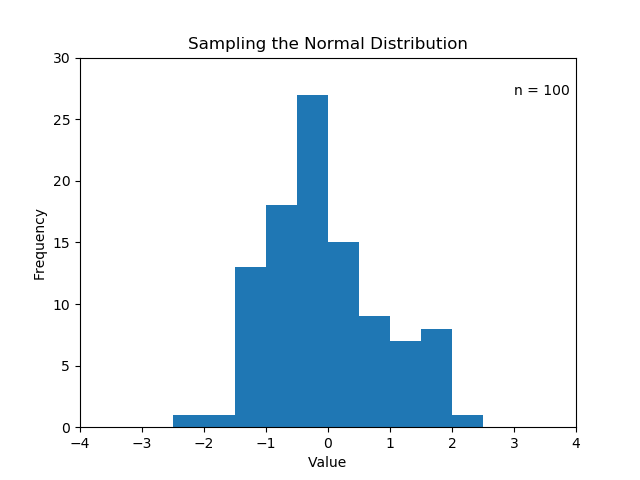

Text(0.5, 0, 'Height')

In [35]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker = 5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [36]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
    
# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7